In [86]:
import pandas as pd
df = pd.read_csv('Powers_TRAIN.csv')
df.head(5)
df.describe()
df.isnull().sum()
df2 = df.copy()
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   ID                1000 non-null   object
 2   gender            1000 non-null   object
 3   Management        1000 non-null   int64 
 4   USAcitizen        1000 non-null   object
 5   Married           1000 non-null   object
 6   MonthsInUnion     1000 non-null   int64 
 7   ContinuingEd      1000 non-null   object
 8   FeatureA          1000 non-null   object
 9   Connectivity      1000 non-null   object
 10  FeatureC          1000 non-null   object
 11  FeatureD          1000 non-null   object
 12  FeatureE          1000 non-null   object
 13  FeatureF          1000 non-null   object
 14  FeatureG          1000 non-null   object
 15  FeatureB          1000 non-null   object
 16  DuesFrequency     1000 non-null   object
 17  PaperlessBillin

In [87]:
from sklearn import preprocessing
import numpy as np

x_array = np.array([2,3,5,6,7,4,8,7,6])

normalized_arr = preprocessing.normalize([x_array])
print(normalized_arr)

[[0.11785113 0.1767767  0.29462783 0.35355339 0.41247896 0.23570226
  0.47140452 0.41247896 0.35355339]]


In [88]:
df.describe()

,Unnamed: 0,Management,MonthsInUnion,MonthlyDues
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,2499.148000,0.168000,34.247000,81.14800
std,1460.826374,0.374053,38.961288,379.19385
min,3.000000,0.000000,0.000000,18.00000
25%,1247.500000,0.000000,9.000000,30.00000
50%,2431.500000,0.000000,28.000000,73.00000
75%,3758.500000,0.000000,56.000000,91.00000
max,7027.000000,1.000000,663.000000,10938.00000


In [89]:
df.head(5)

,Unnamed: 0,ID,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,...,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,3898,Victoria1,Female,0,Yes,Yes,38,Yes,No,onlyViaER,...,Maryville,Maryville,Maryville,Maryville,One year,No,Mailed check,20,749,No
1,1529,Victoria2,Male,0,Yes,Yes,72,Yes,No,Dial-in,...,Maryville,Maryville,Maryville,Maryville,Two year,No,Bank transfer (automatic),21,1494,No
2,3601,Victoria3,Female,0,Yes,Yes,45,Yes,Yes,DSL,...,Yes,Yes,Yes,No,Month-to-month,No,Mailed check,81,3541,No
3,930,Victoria4,Female,0,Yes,Yes,68,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),104,7039,No
4,2997,Victoria5,Female,0,No,No,1,No,Maryville,DSL,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),25,25,No


MonthsInUnion
1      89
72     68
2      29
71     27
3      25
       ..
62      2
510     1
663     1
571     1
0       1
Name: count, Length: 76, dtype: int64

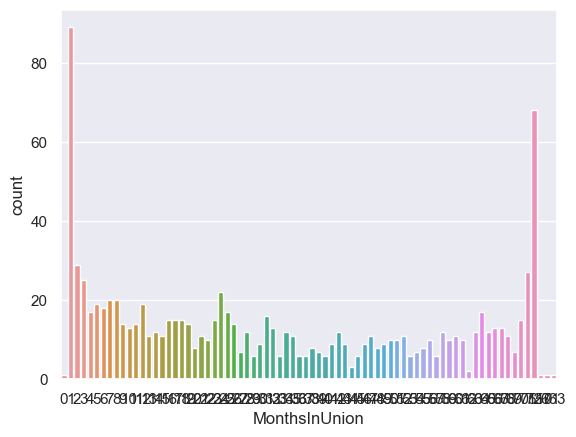

In [90]:
import seaborn as sns
sns.countplot(x='MonthsInUnion',data=df)
df['MonthsInUnion'].value_counts()

In [25]:
import matplotlib.pyplot as plt
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
df_segmentation=pd.read_csv('Powers_TRAIN.csv',index_col=0)
df_segmentation.head()

,ID,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,...,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
3898,Victoria1,Female,0,Yes,Yes,38,Yes,No,onlyViaER,Maryville,...,Maryville,Maryville,Maryville,Maryville,One year,No,Mailed check,20,749,No
1529,Victoria2,Male,0,Yes,Yes,72,Yes,No,Dial-in,Maryville,...,Maryville,Maryville,Maryville,Maryville,Two year,No,Bank transfer (automatic),21,1494,No
3601,Victoria3,Female,0,Yes,Yes,45,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Month-to-month,No,Mailed check,81,3541,No
930,Victoria4,Female,0,Yes,Yes,68,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),104,7039,No
2997,Victoria5,Female,0,No,No,1,No,Maryville,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),25,25,No


In [91]:
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=110)
logreg= LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print("Accuracy:" ,metrics.accuracy_score(y_test, y_pred))

NameError: name 'Y' is not defined

MonthsInUnion
1      89
72     68
2      29
71     27
3      25
       ..
62      2
510     1
663     1
571     1
0       1
Name: count, Length: 76, dtype: int64

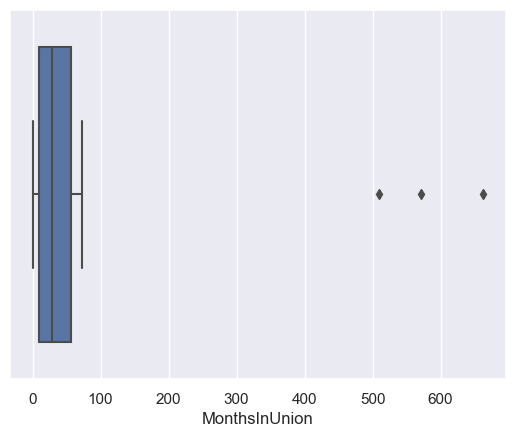

In [92]:
import seaborn as sns
sns.boxplot(x='MonthsInUnion',data=df)
df['MonthsInUnion'].value_counts()

MonthsInUnion
1      89
72     68
2      29
71     27
3      25
       ..
62      2
510     1
663     1
571     1
0       1
Name: count, Length: 76, dtype: int64

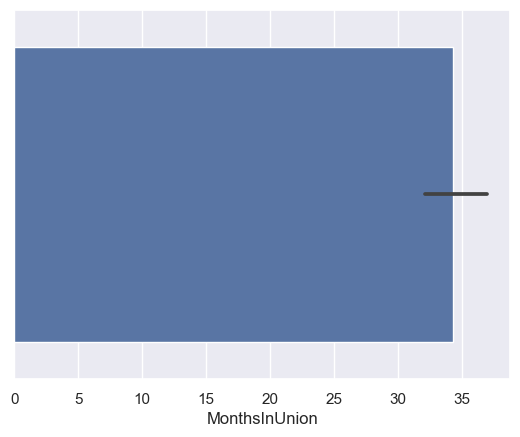

In [93]:
import seaborn as sns
sns.barplot(x='MonthsInUnion',data=df)
df['MonthsInUnion'].value_counts()

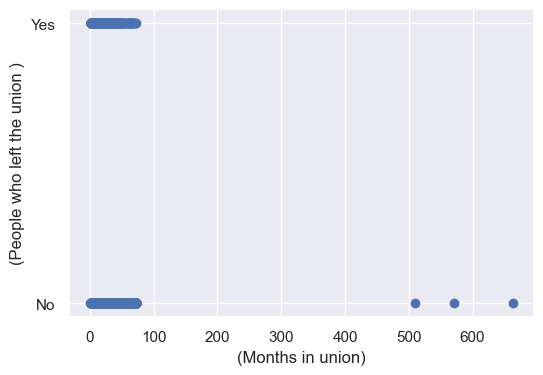

In [94]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df['MonthsInUnion'], df['LeftUnion'])
ax.set_xlabel('(Months in union)')
ax.set_ylabel('(People who left the union )')
plt.show()

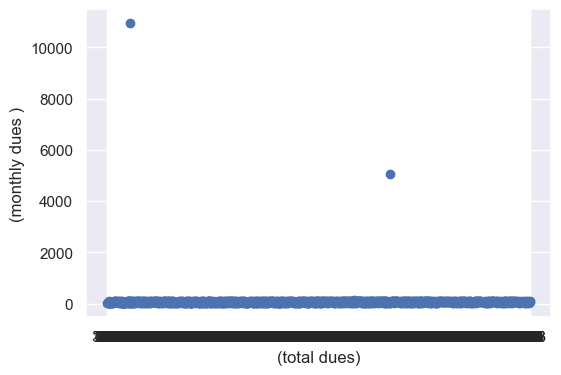

In [95]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df['TotalDues'], df['MonthlyDues'])
ax.set_xlabel('(total dues)')
ax.set_ylabel('(monthly dues )')
plt.show()

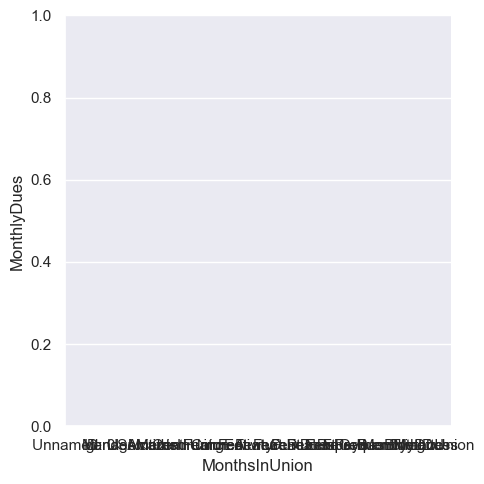

In [96]:
#violin plot
g = sns.catplot(data = df, x = 'MonthsInUnion', y = 'MonthlyDues', 
                kind = 'violin', order = df);
plt.show() 

In [82]:
sns.relplot(x = 'MonthsInUnion', y = 'MonthlyDues', data = df, kind = 'line');
plt.show() 

ValueError: Could not interpret value `MonthsInUnion` for parameter `x`

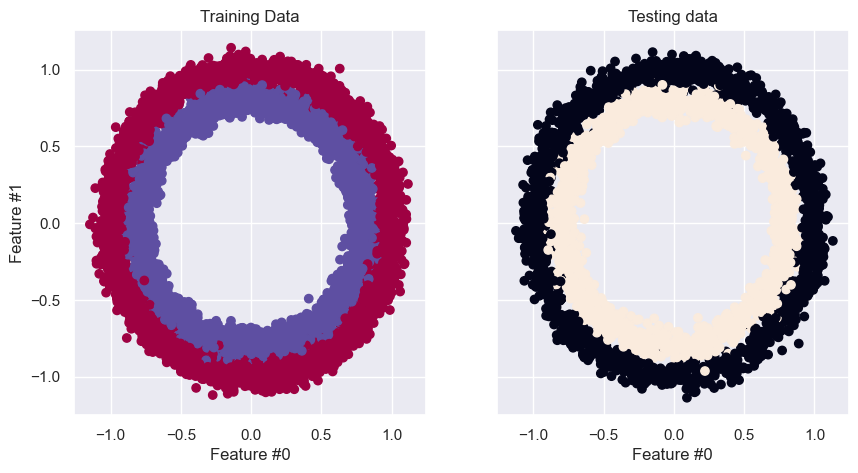

In [73]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Create a dataset with 10,000 samples.
X, y = make_circles(n_samples = 10000,
                    noise= 0.05,
                    random_state=26)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=26)

# Visualize the data.
fig, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10, 5))
train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
train_ax.set_title("Training Data")
train_ax.set_xlabel("Feature #0")
train_ax.set_ylabel("Feature #1")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
test_ax.set_title("Testing data")
plt.show()